In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True



In [6]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [7]:
import FinanceDataReader as fdr
import statsmodels.api as sm
import numpy as np
import pandas as pd
import time
from pandas.tseries.offsets import *
fdr.__version__

'0.6.0'

In [4]:
def change_col(df, name):
    df.columns = [ name + col  for col in df.columns]

In [25]:
def findSymbol(firm_name):
    '''
    firm_name : str type firm name ex)'기아자동차'
    '''
    
    df = fdr.StockListing('KRX')
    try:
        symbol_number = df[df.Name == firm_name].Symbol.values[0]
        return symbol_number
    
    except Exception as e: # 에러 종류
        print('check the firm name. error msg:', e) 
        

In [52]:
def readData(symnumber, startyear, endyear=None):
    '''
    Read data, plot 'Close' stock price
    staryear : dtype = str
    endyear : dtype = str, default = None
    '''
    df = fdr.DataReader(symnumber,startyear, endyear)
    df['Close'].plot()
    plt.show()
    
    return df

In [51]:
def merge_pairs(df1, df2, df1_name, df2_name):
    
    index = pd.date_range(df1.index[0], end = df1.index[-2], freq = BDay())
    df1 = pd.DataFrame(df1, index = index)
    df2 = pd.DataFrame(df2, index = index)
    
    change_col(df1, df1_name)
    change_col(df2, df2_name)
    
    df_pairs = pd.concat([df1,df2], axis =1)
    df_pairs = df_pairs.dropna(how = 'all')
    df_pairs = df_pairs.fillna(method = 'ffill')
    
    if df_merge.isnull().any().sum() ==0:
        return df_pairs
    
    else:
        print('merged dataframe have na data, please check')

In [66]:
def coint_test(df, price='Close', trend='c' ):
    '''
    df : dataframe
    price : Close, Open
    trend : c, ct
    ----------------------------
    
    return tuple (coint_t statistic, p_value)
    '''
    
    if price == 'Close':
        col_index = 0
    else:
        col_index = 1
    
    pair1 = df_merge.iloc[:,col_index]
    pair2 = df_merge.iloc[:,6 + col_index]
    
    coint_t, p_value, critic_value = sm.tsa.coint(pair1, pair2, trend = trend)
    
    result = (coint_t, p_value)
    return result

In [67]:
coint_test_result = coint_test(df_merge, trend = 'ct')

In [68]:
coint_test_result

(-3.4147796749572312, 0.11986961199443064)

In [56]:
df_merge.head()

,kiaClose,kiaOpen,kiaHigh,kiaLow,kiaVolume,kiaChange,hdcarClose,hdcarOpen,hdcarHigh,hdcarLow,hdcarVolume,hdcarChange
2011-08-23,64500.0,60100.0,65200.0,59000.0,6570000.0,0.0932,178000.0,165500.0,184000.0,165000.0,2400000.0,0.1022
2011-08-24,64000.0,65400.0,67800.0,64000.0,5940000.0,-0.0078,180500.0,184000.0,189500.0,180000.0,1990000.0,0.0140
2011-08-25,65200.0,66100.0,67200.0,65000.0,2980000.0,0.0188,188500.0,187500.0,193000.0,186500.0,1610000.0,0.0443
2011-08-26,67000.0,64900.0,67000.0,64200.0,2740000.0,0.0276,192500.0,188500.0,193000.0,187000.0,905150.0,0.0212
2011-08-29,68300.0,68700.0,69200.0,67400.0,3180000.0,0.0194,195000.0,197000.0,198000.0,192000.0,1080000.0,0.0130


In [61]:
col_index = 0
df_merge.iloc[:,col_index]

2011-08-23    64500.0
2011-08-24    64000.0
2011-08-25    65200.0
2011-08-26    67000.0
2011-08-29    68300.0
2011-08-30    68900.0
2011-08-31    70600.0
2011-09-01    69500.0
2011-09-02    69100.0
2011-09-05    66000.0
2011-09-06    67200.0
2011-09-07    69400.0
2011-09-08    69700.0
2011-09-09    68500.0
2011-09-12    68500.0
2011-09-13    68500.0
2011-09-14    65900.0
2011-09-15    67500.0
2011-09-16    70000.0
2011-09-19    69600.0
2011-09-20    71500.0
2011-09-21    72200.0
2011-09-22    71600.0
2011-09-23    67700.0
2011-09-26    67000.0
2011-09-27    71000.0
2011-09-28    70800.0
2011-09-29    71900.0
2011-09-30    71900.0
2011-10-03    71900.0
               ...   
2018-09-06    33650.0
2018-09-07    34250.0
2018-09-10    34000.0
2018-09-11    34050.0
2018-09-12    34400.0
2018-09-13    34150.0
2018-09-14    34050.0
2018-09-17    34050.0
2018-09-18    34500.0
2018-09-19    34550.0
2018-09-20    34850.0
2018-09-21    34550.0
2018-09-24    34550.0
2018-09-25    34550.0
2018-09-26

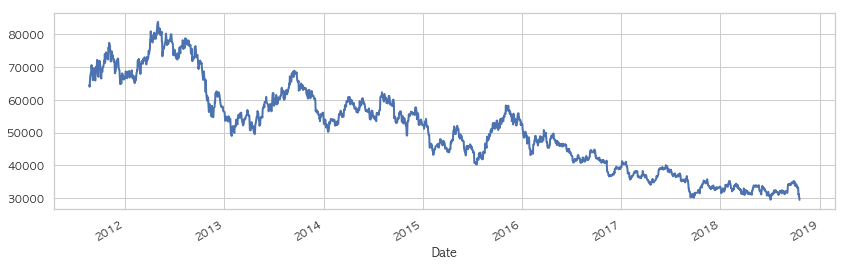

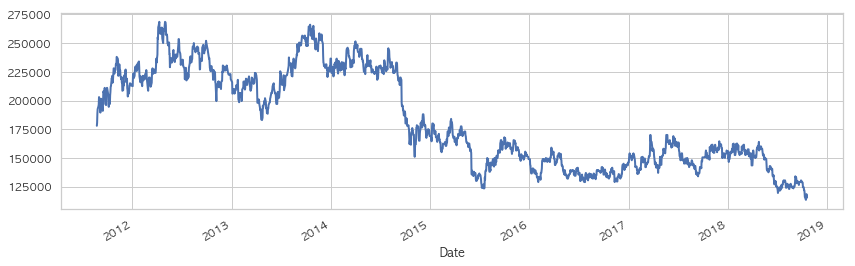

In [31]:
df_kia = readData(kia_num, '2009')
df_hd = readData('005380', '2009')


In [48]:
df_merge = merge_pairs(df_kia, df_hd, 'kia', 'hdcar')

In [ ]:
# 현대차 : 005380
# 기아차 : 000270

In [8]:
index = pd.date_range('2011-8-23', end = '2018-10-12', freq = BDay())

In [9]:
df_hyundai = pd.DataFrame(df_hyundai, index = index)
df_kia = pd.DataFrame(df_kia, index = index)
# df_hyundai = df_hyundai.dropna().copy()
# df_kia = df_kia.dropna().copy()

In [10]:
change_col(df_hyundai, 'hyundai')
change_col(df_kia, 'kia')

In [12]:
min(df_kia.kiaClose)

29550.0

In [13]:
df = pd.concat([df_hyundai,df_kia], axis =1)
df = df.dropna(how = 'all')
df = df.fillna(method = 'ffill')

In [14]:
df

,hyundaiClose,hyundaiOpen,hyundaiHigh,hyundaiLow,hyundaiVolume,hyundaiChange,kiaClose,kiaOpen,kiaHigh,kiaLow,kiaVolume,kiaChange
2011-08-23,178000.0,165500.0,184000.0,165000.0,2400000.0,0.1022,64500.0,60100.0,65200.0,59000.0,6570000.0,0.0932
2011-08-24,180500.0,184000.0,189500.0,180000.0,1990000.0,0.0140,64000.0,65400.0,67800.0,64000.0,5940000.0,-0.0078
2011-08-25,188500.0,187500.0,193000.0,186500.0,1610000.0,0.0443,65200.0,66100.0,67200.0,65000.0,2980000.0,0.0188
2011-08-26,192500.0,188500.0,193000.0,187000.0,905150.0,0.0212,67000.0,64900.0,67000.0,64200.0,2740000.0,0.0276
2011-08-29,195000.0,197000.0,198000.0,192000.0,1080000.0,0.0130,68300.0,68700.0,69200.0,67400.0,3180000.0,0.0194
2011-08-30,196500.0,198500.0,199000.0,192500.0,738900.0,0.0077,68900.0,69000.0,69600.0,67700.0,2400000.0,0.0088
2011-08-31,203000.0,197500.0,204500.0,196500.0,1070000.0,0.0331,70600.0,69500.0,70800.0,68900.0,2730000.0,0.0247
2011-09-01,202500.0,204000.0,209500.0,201000.0,1350000.0,-0.0025,69500.0,71000.0,71800.0,69500.0,3430000.0,-0.0156
2011-09-02,200000.0,203000.0,207500.0,198500.0,860030.0,-0.0123,69100.0,70000.0,70500.0,68800.0,2520000.0,-0.0058
2011-09-05,189500.0,197500.0,198000.0,189500.0,1150000.0,-0.0525,66000.0,68100.0,68200.0,66000.0,2040000.0,-0.0449


In [40]:
train = df[:-len(df)//3]
test = df[len(df)//3:]

In [42]:
Y = train.hyundaiClose
X = train.kiaClose
res = sm.OLS(Y, X).fit()
resid1 = res.resid
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           hyundaiClose   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 7.722e+04
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:37:21   Log-Likelihood:                -13836.
No. Observations:                1197   AIC:                         2.767e+04
Df Residuals:                    1196   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
kiaClose       3.4345      0.012    277.887      0.0

In [43]:
print(sm.tsa.adfuller(resid1)[1])

0.22358540054896398


In [49]:
sm.tsa.coint(X, Y, trend = 'ct')

(-2.6088247311629984,
 0.46018047448299637,
 array([-4.34055356, -3.78853045, -3.50223624]))

In [45]:
logX = np.log(X)
logY = np.log(Y)

In [46]:
res2 = sm.OLS(logY, logX).fit()
resid2 = res.resid
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:           hyundaiClose   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.081e+07
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:38:00   Log-Likelihood:                 759.31
No. Observations:                1197   AIC:                            -1517.
Df Residuals:                    1196   BIC:                            -1512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
kiaClose       1.1125      0.000   3287.300      0.0

In [52]:
sm.tsa.coint(logX, logY, trend = 'ct')

(-2.7290788640468238,
 0.3952789761024231,
 array([-4.34055356, -3.78853045, -3.50223624]))

In [ ]:
coint_t : float
    t-statistic of unit-root test on residuals
pvalue : float
    MacKinnon's approximate, asymptotic p-value based on MacKinnon (1994)
crit_value : dict